In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from collections import OrderedDict
import re
import xlsxwriter 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('baseball_ex1.csv')
df.tail()


,Unnamed: 0,Year,Team,P,PA,N_of_ball,P/PA,LookingStrike,SwingStrike,FoulStrike,...,Minus,WPA.1,PLI,WPA/LI,Clutch,ph,PoilOut,PoilMissing,PoilOut%,salary
117,윤요섭,2016,kt,C,149,555,3.73,29.6,15.6,24.3,...,-2.96,0.17,1.09,0.20,-0.05,33,0,0,0.00,5600
118,유민상,2016,kt,1B,254,1061,4.18,30.1,12.6,29.4,...,-4.06,0.44,0.99,0.66,-0.21,22,0,0,6.35,4500
119,전민수,2016,kt,RF,240,939,3.91,28.8,13.5,28.8,...,-3.64,0.80,0.93,0.77,0.08,17,2,0,3.45,5000
120,오정복,2016,kt,LF,344,1333,3.88,32.3,8.4,26.1,...,-5.50,0.23,1.05,0.36,-0.14,15,0,0,8.89,7000
121,이대형,2016,kt,CF,654,2414,3.69,17.8,12.2,37.3,...,-10.47,0.25,0.97,0.02,0.23,3,0,0,1.16,30000


In [3]:
df1 = df.ix[:,4:] #Feature 비교를 위해 이름, 연도, Team, Position 제거
df1.tail()

,PA,N_of_ball,P/PA,LookingStrike,SwingStrike,FoulStrike,hit/strike,S,B,BatSwing_percent,...,Minus,WPA.1,PLI,WPA/LI,Clutch,ph,PoilOut,PoilMissing,PoilOut%,salary
117,149,555,3.73,29.6,15.6,24.3,30.5,60.2,39.8,42.3,...,-2.96,0.17,1.09,0.20,-0.05,33,0,0,0.00,5600
118,254,1061,4.18,30.1,12.6,29.4,27.9,61.2,38.8,42.8,...,-4.06,0.44,0.99,0.66,-0.21,22,0,0,6.35,4500
119,240,939,3.91,28.8,13.5,28.8,28.9,62.9,37.1,44.8,...,-3.64,0.80,0.93,0.77,0.08,17,2,0,3.45,5000
120,344,1333,3.88,32.3,8.4,26.1,33.1,64.3,35.7,43.5,...,-5.50,0.23,1.05,0.36,-0.14,15,0,0,8.89,7000
121,654,2414,3.69,17.8,12.2,37.3,32.7,65.7,34.3,54.0,...,-10.47,0.25,0.97,0.02,0.23,3,0,0,1.16,30000


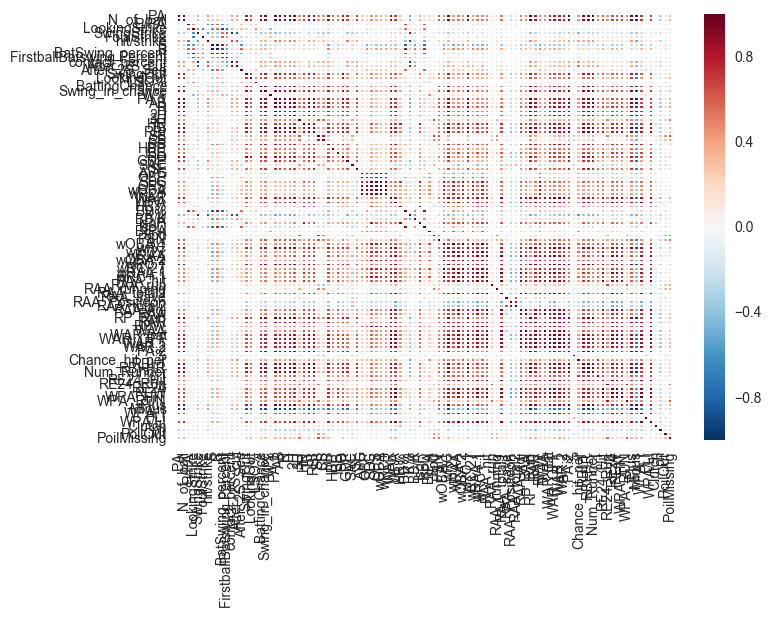

In [8]:
corr_data = pd.DataFrame.corr(df1.ix[:,:-2])
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

### Feature 값이 너무 많아 도메인 지식을 활용해서 연봉에 영향을 미칠 수 있는 것들로 골라서 줄여주었음(109 → 39)

In [2]:
df1 = pd.read_csv('baseball_preprocessing2.csv')
df1.tail()

,name,Year,Team,P,P/PA,BatSwing_percent,contact_percent,BattingchanceSwing%,PA,AB,...,RP_Run,RAR,WAA,Chance_hit_per,RE24,WPA.1,PoilOut,PoilMissing,PoilOut%,salary
117,윤요섭,2016,kt,C,3.73,42.3,77.9,5.4,149,126,...,8.5,4.4,-0.4,0.205,-1.19,0.17,0,0,0.00,5600
118,유민상,2016,kt,1B,4.18,42.8,81.9,8.7,254,213,...,14.5,5.2,-0.8,0.312,4.66,0.44,0,0,6.35,4500
119,전민수,2016,kt,RF,3.91,44.8,81.0,10.0,240,213,...,13.7,13.9,0.0,0.362,12.96,0.80,2,0,3.45,5000
120,오정복,2016,kt,LF,3.88,43.5,87.6,7.5,344,306,...,19.6,5.8,-1.2,0.313,-2.71,0.23,0,0,8.89,7000
121,이대형,2016,kt,CF,3.69,54.0,85.1,10.0,654,600,...,37.3,13.5,-2.1,0.315,-7.55,0.25,0,0,1.16,30000


In [5]:
df2 = df1.ix[:,4:]
df2.tail()

,P/PA,BatSwing_percent,contact_percent,BattingchanceSwing%,PA,AB,R,TB,RBI,AVG,...,RP_Run,RAR,WAA,Chance_hit_per,RE24,WPA.1,PoilOut,PoilMissing,PoilOut%,salary
117,3.73,42.3,77.9,5.4,149,126,14,54,16,0.238,...,8.5,4.4,-0.4,0.205,-1.19,0.17,0,0,0.00,5600
118,4.18,42.8,81.9,8.7,254,213,30,86,37,0.282,...,14.5,5.2,-0.8,0.312,4.66,0.44,0,0,6.35,4500
119,3.91,44.8,81.0,10.0,240,213,31,90,29,0.305,...,13.7,13.9,0.0,0.362,12.96,0.80,2,0,3.45,5000
120,3.88,43.5,87.6,7.5,344,306,45,123,36,0.304,...,19.6,5.8,-1.2,0.313,-2.71,0.23,0,0,8.89,7000
121,3.69,54.0,85.1,10.0,654,600,89,215,42,0.320,...,37.3,13.5,-2.1,0.315,-7.55,0.25,0,0,1.16,30000


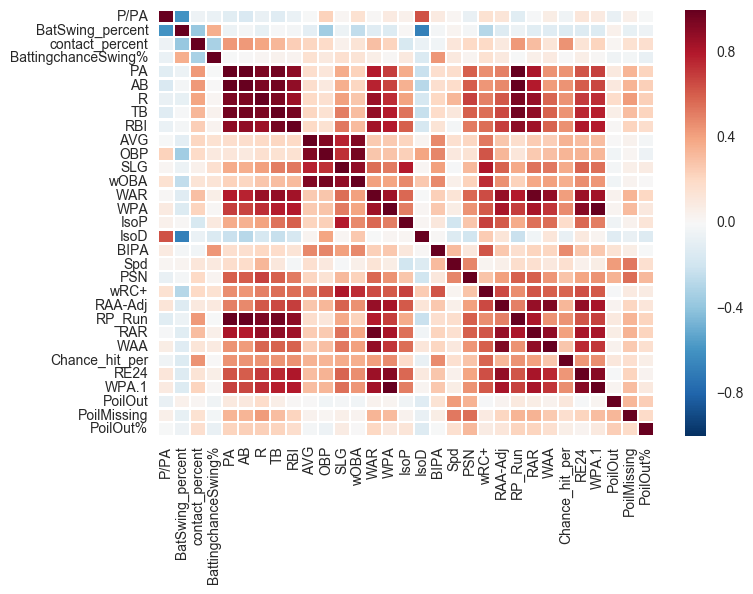

In [16]:
corr_data = pd.DataFrame.corr(df2.ix[:,:-1])
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

In [4]:
model_sm = sm.OLS(df2.ix[:,-1], df2.ix[:,:-1])
result_sm = model_sm.fit()
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     14.90
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           5.40e-24
Time:                        18:44:08   Log-Likelihood:                -1364.6
No. Observations:                 122   AIC:                             2791.
Df Residuals:                      91   BIC:                             2878.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
P/PA                -6904.6151   1

p-value 값들이 너무 높아서 의미가 없음

#### 다중공선성을 줄여주기 위해 
1. 도메인 지식을 활용하여 피쳐들(x값들을) 그룹화를 시켜 줄여줌
2. PCA를 통해 줄여줌

#### 먼저 피쳐 값들의 범위가 다르기 때문에 스케일링 실시

In [3]:
from sklearn.preprocessing import normalize

In [6]:
dfY = pd.DataFrame(df2, columns=['salary'])
dfX = df2.ix[:,:-1]

In [7]:
normalize_list = list(dfX.columns)

result = []
for item in normalize_list:
    result.append(normalize(dfX[item]).T)
    
df_Hitter = pd.DataFrame(np.hstack(result), columns=normalize_list)

c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\skle

In [18]:
group1 = (df_Hitter['P/PA']+ df_Hitter['BatSwing_percent']+ df_Hitter['contact_percent'] + df_Hitter['BattingchanceSwing%']/4)
group2 = (df_Hitter['PA']+df_Hitter['AB']+df_Hitter['R']+df_Hitter['TB']+df_Hitter['RBI']+ df_Hitter['AVG']+ df_Hitter['OBP']+ df_Hitter['SLG']+ df_Hitter['wOBA']+ df_Hitter['WAR']+ df_Hitter['WPA'])/11
group3 = (df_Hitter['IsoP']+ df_Hitter['IsoD']+ df_Hitter['BIPA']+ df_Hitter['Spd']+ df_Hitter['PSN']+ df_Hitter['wRC+'])/6 
group4 = (df_Hitter['RAA-Adj']+ df_Hitter['RP_Run']+ df_Hitter['RAR']+ df_Hitter['WAA'])/4 
group5 = (df_Hitter['Chance_hit_per']+ df_Hitter['RE24']+ df_Hitter['WPA'])/3 
group6 = (df_Hitter['PoilOut']+ df_Hitter['PoilMissing']+ df_Hitter['PoilOut%'])/3

In [23]:
df_Hitter_Revise = pd.concat([group1, group2, group3, group4, group5, group6, dfY],axis=1)
df_Hitter_Revise.columns = ['Basic','Extend','Value','Clutch','Run', 'Miss', 'Salary']

In [24]:
df_Hitter_Revise.tail()

,Basic,Extend,Value,Clutch,Run,Miss,Salary
117,0.272522,0.044614,0.070481,-0.001438,0.021255,0.000000,5600
118,0.296676,0.058033,0.068528,-0.001423,0.043530,0.051005,4500
119,0.296629,0.059866,0.077535,0.027706,0.064654,0.123937,5000
120,0.294640,0.065334,0.063259,-0.010799,0.030846,0.071407,7000
121,0.314535,0.093599,0.065783,-0.021543,0.024875,0.009318,30000


In [52]:
regression1 = 'Salary ~ np.log(Basic) + Extend + Value + Clutch + Run + Miss ' 
weight_model = sm.OLS.from_formula(regression1, data=df_Hitter_Revise)
result1 = weight_model.fit()
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     62.25
Date:                Thu, 06 Apr 2017   Prob (F-statistic):           3.35e-24
Time:                        19:17:27   Log-Likelihood:                -1380.3
No. Observations:                 122   AIC:                             2769.
Df Residuals:                     118   BIC:                             2780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.735e+04   9285.395      1.869      0.0

### 다중공선성이 있는 것을 PCA를 해줌

In [8]:
from sklearn.decomposition import PCA

In [ ]:
X_pca = PCA(n_components=4)
X_pca.fit_transform(df_Hitter)

dfX_pca = pd.DataFrame(X_pca.fit_transform(df_Hitter))
dfX_pca.columns = ['PC1', 'PC2', 'PC3','PC4']

In [21]:
group1 = df_Hitter.ix[:,['PA','AB' , 'R', 'TB', 'RBI','RP_Run','RAR','WAR', 'WPA', 'IsoP','RE24', 'WPA.1']]
group2 = df_Hitter.ix[:,['AVG', 'OBP', 'SLG', 'wOBA']]


In [22]:
X_pca1 = PCA(n_components=1)
X_pca1.fit_transform(group1)
dfX_PCA1 = pd.DataFrame(X_pca1.fit_transform(group1))

X_pca2 = PCA(n_components=1)
X_pca2.fit_transform(group2)
dfX_PCA2 = pd.DataFrame(X_pca2.fit_transform(group2))


In [23]:
del df_Hitter['PA']
del df_Hitter['AB']
del df_Hitter['R']
del df_Hitter['TB']
del df_Hitter['RBI']
del df_Hitter['AVG']
del df_Hitter['OBP']
del df_Hitter['SLG']
del df_Hitter['wOBA']
del df_Hitter['WAR']
del df_Hitter['WPA']
del df_Hitter['IsoP']
del df_Hitter['RE24']
del df_Hitter['WPA.1']
del df_Hitter['RP_Run']
del df_Hitter['RAR']

In [25]:
PCA_model_data = pd.concat([dfX_PCA1,dfX_PCA2,df_Hitter, np.log(dfY)], axis = 1)
PCA_model_data.columns = ['group1','group2','P_Pa', 'BatSwing_percent','Contact_percent','BattingchanceSwing_p','IsoD','BIPA','Spd','PSN','wRC_plus','RAA_Adj','WAA','Chance_hit_per','PoilOut','PoilMissing','PoilOut_p','Salary']

In [26]:
regression1 = 'Salary ~ group1+group2+P_Pa+BatSwing_percent+Contact_percent+BattingchanceSwing_p+IsoD+BIPA+Spd+PSN+wRC_plus+RAA_Adj+WAA+Chance_hit_per+PoilOut+PoilMissing+PoilOut_p' 
weight_model = sm.OLS.from_formula(regression1, data=PCA_model_data)
result1 = weight_model.fit()
print result1.summary()

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     18.43
Date:                Sun, 09 Apr 2017   Prob (F-statistic):           4.83e-24
Time:                        12:20:43   Log-Likelihood:                -96.422
No. Observations:                 122   AIC:                             228.8
Df Residuals:                     104   BIC:                             279.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.5022 

### 전체 PCA

In [8]:
from sklearn.decomposition import PCA

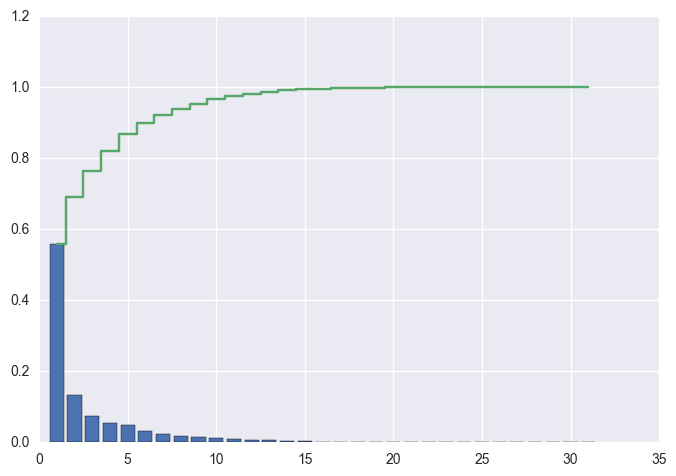

In [9]:
pca = PCA().fit(df_Hitter)
var = pca.explained_variance_
cmap = sns.color_palette()

plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()

##### PCA 갯수 정하기 - 3~4개가 적당하다고 판단

In [10]:
pca = PCA(n_components = 4)
pca.fit(df_Hitter)

k= pca.explained_variance_ratio_
sum = k[0] + k[1] + k[2] + k[3]
print k
print 'Average:' + str(sum)

[ 0.55855834  0.13293885  0.07301072  0.05469989]
Average:0.81920781341


In [11]:
pca = PCA(n_components = 3)
pca.fit(df_Hitter)

k= pca.explained_variance_ratio_
sum = k[0] + k[1] + k[2]
print k
print 'Average:' + str(sum)

[ 0.55855834  0.13293885  0.07301072]
Average:0.764507920119


In [12]:
X_pca = PCA(n_components = 4)

dfX_pca = pd.DataFrame(X_pca.fit_transform(df_Hitter))
dfy_pca = np.log(dfY.astype(float))

dfX_pca.columns = ['PC1','PC2','PC3','PC4']
dfX_pca.index = np.arange(1,len(dfX_pca)+1)
dfy_pca.index = np.arange(1,len(dfY)+1)

PCA_data = pd.concat([dfX_pca, dfy_pca],axis=1)
PCA_data.columns = ['PC1','PC2','PC3','PC4','Salary']

df_PCA = pd.DataFrame(X_pca.components_,columns=df_Hitter.columns,index = ['PC1', 'PC2', 'PC3', 'PC4'])
df_PCA

,P/PA,BatSwing_percent,contact_percent,BattingchanceSwing%,PA,AB,R,TB,RBI,AVG,...,RAA-Adj,RP_Run,RAR,WAA,Chance_hit_per,RE24,WPA.1,PoilOut,PoilMissing,PoilOut%
PC1,0.000963,-0.006123,0.009536,0.006862,0.169843,0.166968,0.201696,0.206692,0.217399,0.032693,...,0.352322,0.169891,0.277336,0.344503,0.048431,0.318043,0.301610,0.042470,0.147453,0.068576
PC2,-0.007433,0.007250,0.010810,-0.019977,0.083575,0.095435,0.112663,0.038186,-0.021131,-0.019129,...,-0.193785,0.083631,-0.007510,-0.144831,0.010778,-0.172547,-0.091741,0.591761,0.490353,0.283204
PC3,-0.017970,0.014186,0.028484,-0.019979,0.309014,0.323853,0.211902,0.257984,0.251324,-0.023891,...,-0.348911,0.308832,0.014824,-0.442071,0.037028,-0.059403,0.010111,-0.393946,-0.110501,0.011393
PC4,-0.009496,0.009445,0.003410,-0.010489,0.025063,0.033921,-0.001795,0.055850,0.070725,-0.009119,...,0.059935,0.025102,0.056263,0.085710,-0.010625,-0.088634,-0.110608,0.215156,-0.609810,0.700337


#### PCA 성분을 봄으로써 PCA된 값들을 분석

In [13]:
df_PCA.ix[:,:10]

,P/PA,BatSwing_percent,contact_percent,BattingchanceSwing%,PA,AB,R,TB,RBI,AVG
PC1,0.000963,-0.006123,0.009536,0.006862,0.169843,0.166968,0.201696,0.206692,0.217399,0.032693
PC2,-0.007433,0.007250,0.010810,-0.019977,0.083575,0.095435,0.112663,0.038186,-0.021131,-0.019129
PC3,-0.017970,0.014186,0.028484,-0.019979,0.309014,0.323853,0.211902,0.257984,0.251324,-0.023891
PC4,-0.009496,0.009445,0.003410,-0.010489,0.025063,0.033921,-0.001795,0.055850,0.070725,-0.009119


In [51]:
df_PCA.ix[:,10:22]

,OBP,SLG,wOBA,WAR,WPA,IsoP,IsoD,BIPA,Spd,PSN,wRC+,RAA-Adj
PC1,0.026053,0.062075,0.037988,0.286845,0.302913,0.110201,-0.003252,0.017766,0.029156,0.194077,0.095187,0.352322
PC2,-0.032163,-0.043568,-0.035699,-0.033287,-0.089669,-0.090151,-0.082961,0.000288,0.202695,0.346459,-0.064182,-0.193785
PC3,-0.046541,-0.026405,-0.037836,0.014907,0.016337,-0.039401,-0.141745,-0.025243,-0.064671,0.068654,-0.037970,-0.348911
PC4,-0.015721,0.037939,0.003088,0.039062,-0.106984,0.116620,-0.048284,-0.006076,-0.113478,-0.031343,0.040587,0.059935


In [52]:
df_PCA.ix[:,23:]

,RAR,WAA,Chance_hit_per,RE24,WPA.1,PoilOut,PoilMissing,PoilOut%
PC1,0.277336,0.344503,0.048431,0.318043,0.301610,0.042470,0.147453,0.068576
PC2,-0.007510,-0.144831,0.010778,-0.172547,-0.091741,0.591761,0.490353,0.283204
PC3,0.014824,-0.442071,0.037028,-0.059403,0.010111,-0.393946,-0.110501,0.011393
PC4,0.056263,0.085710,-0.010625,-0.088634,-0.110608,0.215156,-0.609810,0.700337


### PCA 해석
- PC1 : WAR, WPA, RAA-Adj, RAR, WAA, WPA.1에 영향을 많이 받음// 즉 주전이면서 득점을 많이 하고 팀 승리 기여도가 높은 선수
- PC2 : SPD, PSN, PoilOut, PoilMissing, Poil out%에 영향을 많이 받음 // 즉 스피드가 빠르면서 실책을 많이 한 선수
- PC3 : PA, AB, R, TB, RPrun에 영향을 많이 받음 // 즉 주전이면서 성적이 좋은 선수
- PC4 : IsoP, Poil out에 영향을 많이 받음 // 즉 장타율은 높지만 견제사를 많이 당한 선수

In [15]:
X_pca = PCA(n_components=4)
X_pca.fit_transform(df_Hitter)

dfX_pca = pd.DataFrame(X_pca.fit_transform(df_Hitter))
dfX_pca.columns = ['PC1', 'PC2', 'PC3','PC4']

PCA_model_data = pd.concat([dfX_pca, np.log(dfY)], axis = 1)
PCA_model_data.columns = ['PC1', 'PC2', 'PC3','PC4', 'SALARY']

In [16]:
regression2 = 'SALARY ~ PC1 + PC2 + PC3+ PC4'
PCA_model = sm.OLS.from_formula(regression2, data=PCA_model_data)
result2 = PCA_model.fit()
print result2.summary()

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     84.45
Date:                Wed, 19 Apr 2017   Prob (F-statistic):           1.43e-33
Time:                        14:19:55   Log-Likelihood:                -98.363
No. Observations:                 122   AIC:                             206.7
Df Residuals:                     117   BIC:                             220.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7171      0.050    193.961      0.0

### 아웃라이어 찾기

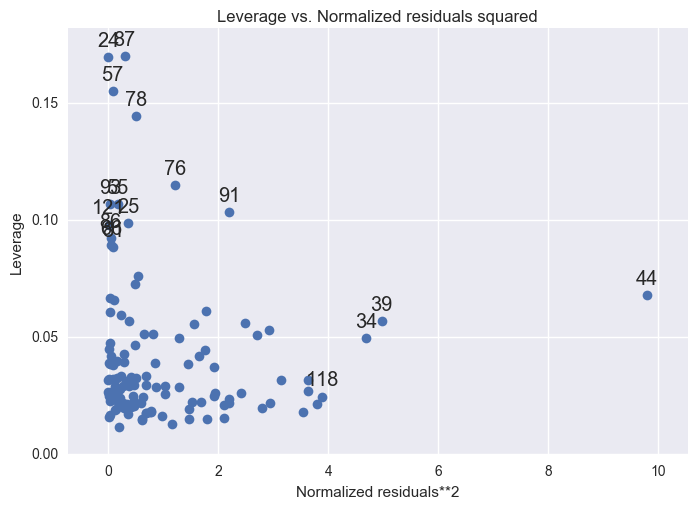

In [61]:
sm.graphics.plot_leverage_resid2(result2)

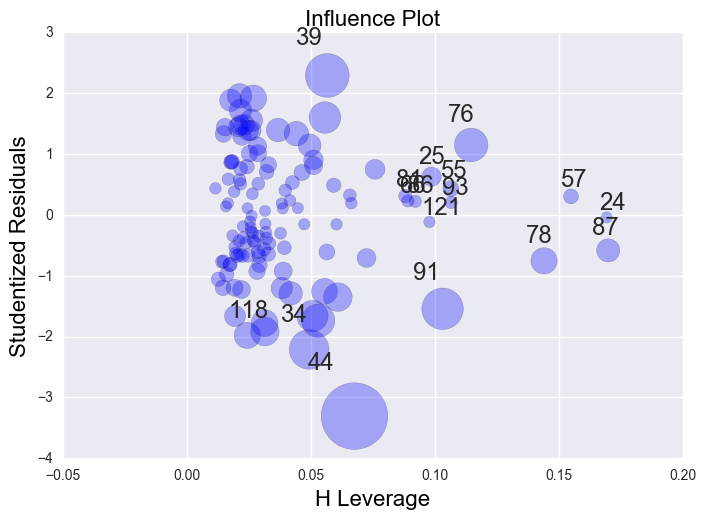

In [63]:
sm.graphics.influence_plot(result2, plot_alpha=0.3)
plt.show()

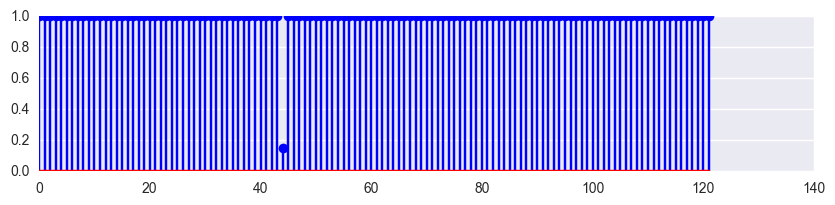

In [64]:
plt.figure(figsize = (10,2))
plt.stem(result2.outlier_test().ix[:, -1])
plt.show()

#### 아웃라이어 44(김재환 - 두산)
- 2015년까지 만년 유망주였다 2016년 갑자기 리그 최상급 선수로 발돋움 
- 134경기 0.325 37홈런 107득점 124타점 외야수 골든글러브 
- 즉 갑자기 포텐이 폭발하여 성적이 좋아졌고 연봉 인상률은 크지만 전체에 비하면 돈을 적게 받는편(아웃라이어로 적절함)

#### Outlier 제거

In [17]:
PCA_model_data = PCA_model_data.drop(44)
PCA_model_data

,PC1,PC2,PC3,PC4,SALARY
0,-0.106839,-0.059643,-0.004247,-0.042515,8.732305
1,-0.185793,-0.056364,-0.025717,-0.023056,8.699515
2,0.360160,-0.157824,-0.010502,0.025480,11.695247
3,-0.169319,-0.019843,0.072793,-0.029075,10.126631
4,-0.152375,-0.099761,-0.066033,-0.011552,9.615805
5,-0.062885,-0.043410,0.101336,-0.007022,10.463103
6,0.012130,0.085966,0.119139,0.095559,11.082143
7,-0.127070,0.052386,-0.084303,-0.026338,8.455318
8,0.003868,-0.031448,0.077146,-0.021385,10.596635
9,-0.169099,-0.023973,-0.015363,0.012749,8.612503


In [17]:
formula_str = """SALARY ~ PC1 + PC2 + PC3+ PC4"""


model = sm.OLS.from_formula(formula_str, data=PCA_model_data)
result = model.fit()
table_anova = sm.stats.anova_lm(result)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
PC1,1.0,84.012579,84.012579,297.670139,8.155171e-34
PC2,1.0,1.511343,1.511343,5.354931,2.242408e-02
PC3,1.0,19.513429,19.513429,69.139232,1.996833e-13
PC4,1.0,1.445462,1.445462,5.121505,2.549143e-02
Residual,116.0,32.739123,0.282234,NaN,NaN


In [18]:
regression2 = 'SALARY ~ PC1 + PC2 + PC3+ PC4'
PCA_model = sm.OLS.from_formula(regression2, data=PCA_model_data)
result2 = PCA_model.fit()
print result2.summary()

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     94.32
Date:                Wed, 19 Apr 2017   Prob (F-statistic):           1.57e-35
Time:                        14:20:15   Log-Likelihood:                -92.605
No. Observations:                 121   AIC:                             195.2
Df Residuals:                     116   BIC:                             209.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7320      0.048    201.454      0.0

#### Outlier 제거후 R-squared 값이 향상된 것을 알 수 있었음(0.743 => 0.765)

### Cross Validation
- Label K Fold 사용
- Cross Validation 하기 전에 outlier를 제거한 index를 Median으로 채움

In [19]:
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import LabelKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
imp = Imputer(missing_values = "NaN", strategy = "median", axis =0)
PCA_model_data_imp = imp.fit_transform(PCA_model_data)

PCA_model_data_fin = pd.DataFrame(PCA_model_data_imp, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'SALARY'])
PCA_model_data_fin_x = pd.DataFrame(PCA_model_data_fin, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
PCA_model_data_fin_y = pd.DataFrame(PCA_model_data_fin, columns = ['SALARY'])

In [29]:
cv = LabelKFold(PCA_model_data_fin_y['SALARY'], n_folds=3)
model = LinearRegression()
scores = np.zeros(3)

for i, (train_index, test_index) in enumerate(cv):
    X_train = PCA_model_data_fin_x.ix[train_index]
    y_train = PCA_model_data_fin_y['SALARY'][train_index]
    X_test = PCA_model_data_fin_x.ix[test_index]
    y_test = PCA_model_data_fin_y['SALARY'][test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #scores[i] = mean_squared_error(y_test, y_pred)
    scores[i] = r2_score(y_test, y_pred)

print '평균 R-Square값:' + str(np.mean(scores))


평균 R-Square값:0.726790540398


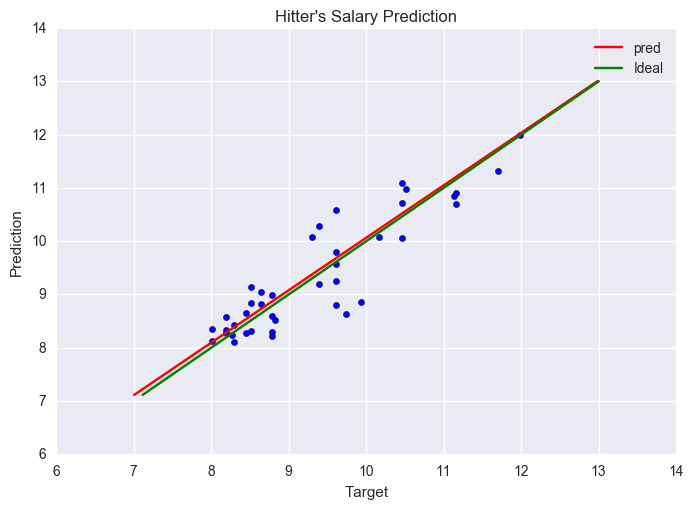

In [31]:
plt.scatter(y_test, y_pred)
plt.title('Hitter\'s Salary Prediction')
plt.ylabel('Prediction')
plt.xlabel('Target')
xx = np.linspace(np.min(y_test) - 1, np.max(y_test) + 1, 1000)
yy = np.linspace(np.min(y_pred) - 1, np.max(y_pred) + 1, 1000)
pred = plt.plot(xx, yy, 'r-', label='pred')
Ideal = plt.plot(yy, yy, 'g-', label='Ideal')
plt.legend()
plt.show()

### 한계점
- 

### Anova분석

In [51]:
formula_str = """Salary ~ Basic + Extend + Value + Clutch + Run + Miss"""


model = sm.OLS.from_formula(formula_str, data=df_Hitter_Revise)
result = model.fit()
table_anova = sm.stats.anova_lm(result)
table_anova

,df,sum_sq,mean_sq,F,PR(>F)
Basic,1.0,2.002158e+07,2.002158e+07,0.051789,8.203826e-01
Extend,1.0,6.734829e+10,6.734829e+10,174.208097,8.888445e-25
Value,1.0,6.617592e+09,6.617592e+09,17.117556,6.716902e-05
Clutch,1.0,3.834780e+09,3.834780e+09,9.919327,2.084442e-03
Run,1.0,1.168556e+09,1.168556e+09,3.022673,8.478434e-02
Miss,1.0,4.916621e+08,4.916621e+08,1.271770,2.617823e-01
Residual,115.0,4.445863e+10,3.865968e+08,NaN,NaN
